In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
num_points = 2000
vectors_set = []
for i in xrange(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])    

In [3]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set], 
                   "y": [v[1] for v in vectors_set]})


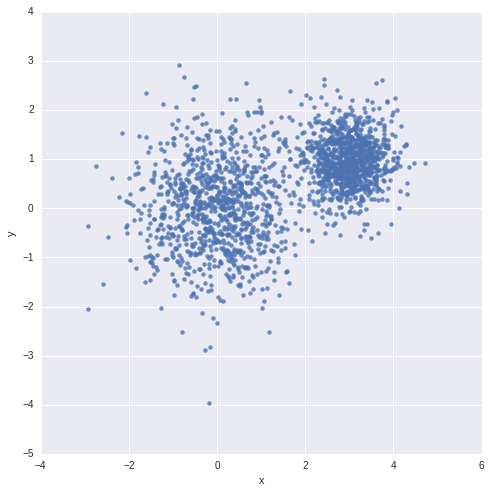

In [4]:
sns.lmplot("x", "y", data=df, fit_reg=False, size=7)
plt.show()

In [23]:
tf.reset_default_graph()
vectors = tf.constant(vectors_set, name='vectors_set')
k = 4
#shuffle the point and get the first 4 to be the random centroids
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0],[k,-1]), name ='centroids')

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print expanded_vectors.get_shape()
print expanded_centroids.get_shape()
assignments = tf.arg_min(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroids)),2),0)


means = tf.concat(0, [
  tf.reduce_mean(
      tf.gather(vectors, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1])
  for c in xrange(k)])
update_centroids = tf.assign(centroids, means)
init_op = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init_op)
writer = tf.train.SummaryWriter('/tmp/tensorflow', graph=tf.get_default_graph())


for step in xrange(1000):
   _, centroid_values, assignment_values = sess.run([update_centroids,
                                                    centroids,
                                                    assignments])
print "centroids"
print centroid_values

(1, 2000, 2)
(4, 1, 2)
centroids
[[ 0.40373585  0.47879377]
 [ 2.68595529  1.3582375 ]
 [-0.56184393 -0.52474105]
 [ 3.16456509  0.70124847]]


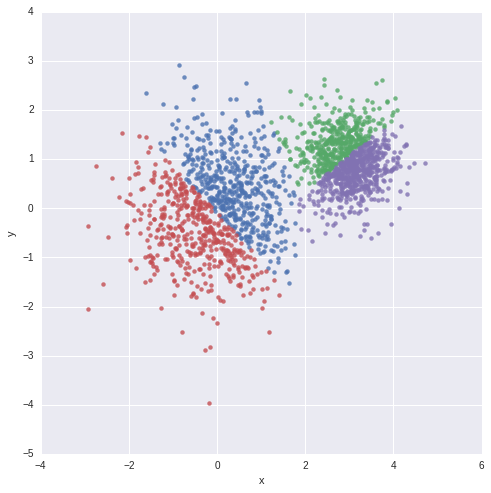

In [24]:
data = {"x": [], "y": [], "cluster": []}
for i in xrange(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=7, hue="cluster", legend=False)
plt.show()